In [1]:
import networkx as nx
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from utils import monte_carlo_experiment

Исследование $T^{dist}$ в зависимости от lambda и параметров генерации

In [2]:
#Фиксируем параметры процедуры построения графа
D = 0.7             # параметр d для dist графа
n_sampels = 100     # число итераций
N = 200             # размер набора генерируемых данных
GRAPH_TYPE = 'dist'  # тип графа 



Исследуем для H0

In [3]:
lambdas = np.arange(0.1, 10.1, 0.1) #сгенерировали набор лямбд 
results_with_variable_lambda_h0 = {}


for l in tqdm(lambdas, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': D,
            'lambda': l,
            'distribution': 'h0'
         }

    results_with_variable_lambda_h0[l] = monte_carlo_experiment(params, n_sampels)

Processing: 100%|██████████| 100/100 [02:50<00:00,  1.70s/it]


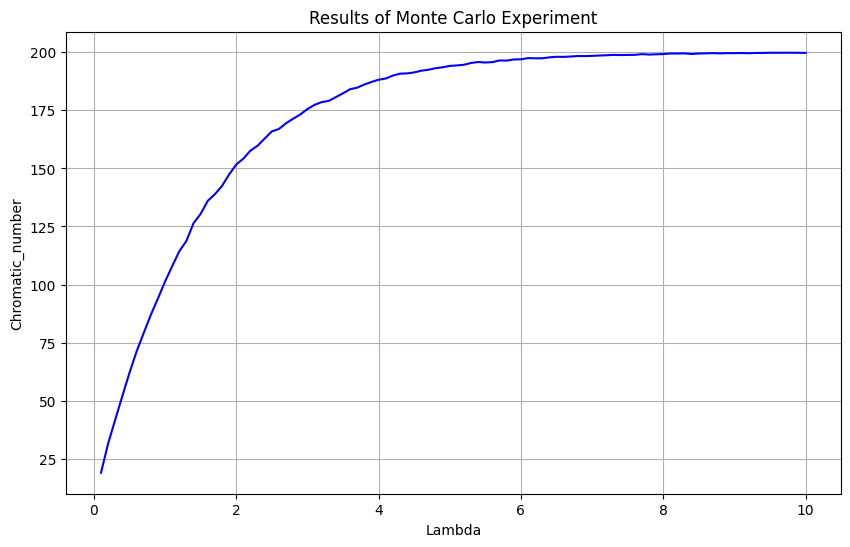

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(results_with_variable_lambda_h0.keys(), results_with_variable_lambda_h0.values(), linestyle='-', color='b')
plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Lambda')
plt.ylabel('Chromatic_number')
plt.grid()
plt.show()

Как мы видим, при увеличении параметра lambda хроматическое число уменьшается.

Сделаем то же самое для H1

In [5]:
lambdas = np.arange(0.1, 10.1, 0.1) #сгенерировали набор лямбд 
results_with_variable_lambda_h1 = {}


for l in tqdm(lambdas, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': D,
            'lambda': l,
            'distribution': 'h1'
         }

    results_with_variable_lambda_h1[l] = monte_carlo_experiment(params, n_sampels)

Processing: 100%|██████████| 100/100 [01:21<00:00,  1.22it/s]


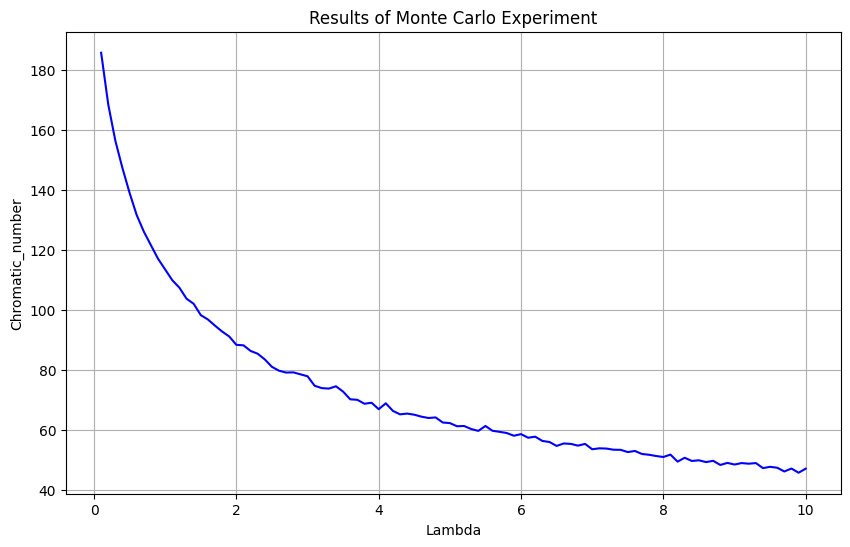

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(results_with_variable_lambda_h1.keys(), results_with_variable_lambda_h1.values(), linestyle='-', color='b')
plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Lambda')
plt.ylabel('Chromatic_number')
plt.grid()
plt.show()

При увеличении lambda хроматическое число графа уменьшается

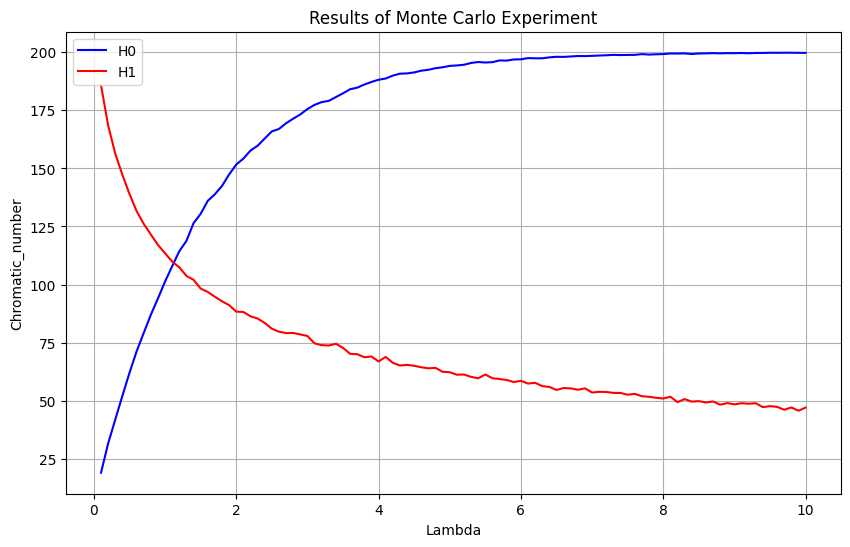

In [26]:
plt.figure(figsize=(10, 6))

# График для h0
plt.plot(results_with_variable_lambda_h0.keys(), results_with_variable_lambda_h0.values(), linestyle='-', color='b', label='H0')

# График для h1
plt.plot(results_with_variable_lambda_h1.keys(), results_with_variable_lambda_h1.values(), linestyle='-', color='r', label='H1')

plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Lambda')
plt.ylabel('Chromatic_number')
plt.grid()
plt.legend() 
plt.show()


Теперь посмотрим, как оно зависит от параметра d для H0

In [7]:
dist = np.arange(0.1, 10.1, 0.1)
results_with_variable_d_h0 = {}


for d in tqdm(dist, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': d,
            'lambda': 1,
            'distribution': 'h0'
         }

    results_with_variable_d_h0[d] = monte_carlo_experiment(params, n_sampels)

Processing: 100%|██████████| 100/100 [03:09<00:00,  1.90s/it]


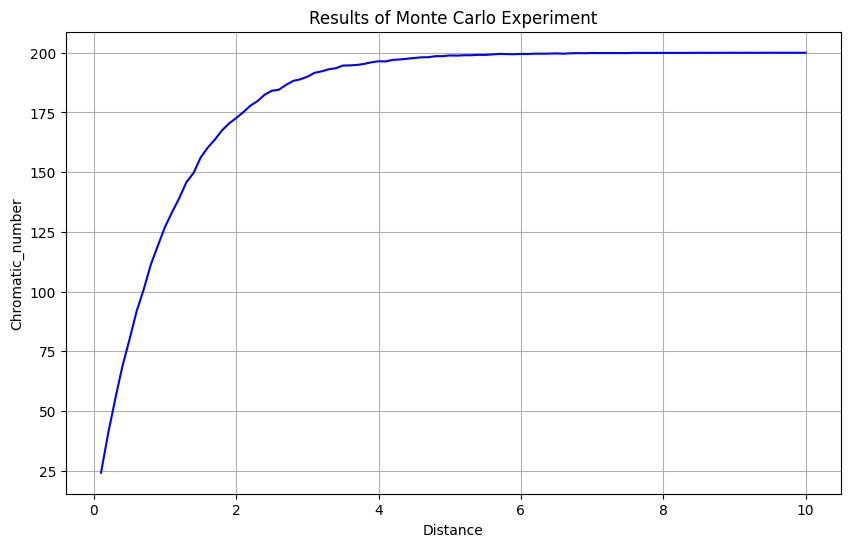

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(results_with_variable_d_h0.keys(), results_with_variable_d_h0.values(), linestyle='-', color='b')
plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Distance')
plt.ylabel('Chromatic_number')
plt.grid()
plt.show()

Как мы видим, хроматическое число увеличивается при увеличении d и стремится к числу вершин графа.

Теперь для H1

In [9]:
dist = np.arange(0.1, 10.1, 0.1)
results_with_variable_d_h1 = {}


for d in tqdm(dist, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': d,
            'lambda': 1/np.sqrt(10),
            'distribution': 'h1'
         }

    results_with_variable_d_h1[d] = monte_carlo_experiment(params, n_sampels)

Processing: 100%|██████████| 100/100 [03:12<00:00,  1.93s/it]


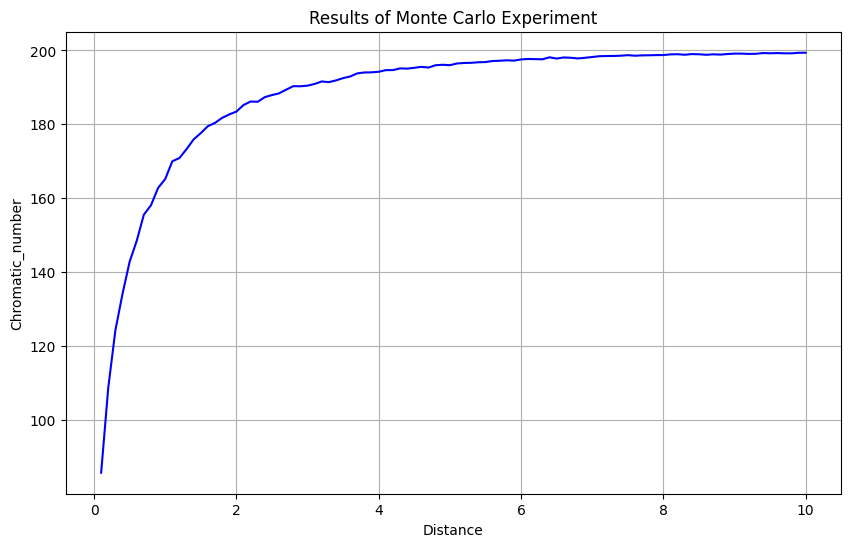

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(results_with_variable_d_h1.keys(), results_with_variable_d_h1.values(), linestyle='-', color='b')
plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Distance')
plt.ylabel('Chromatic_number')
plt.grid()
plt.show()

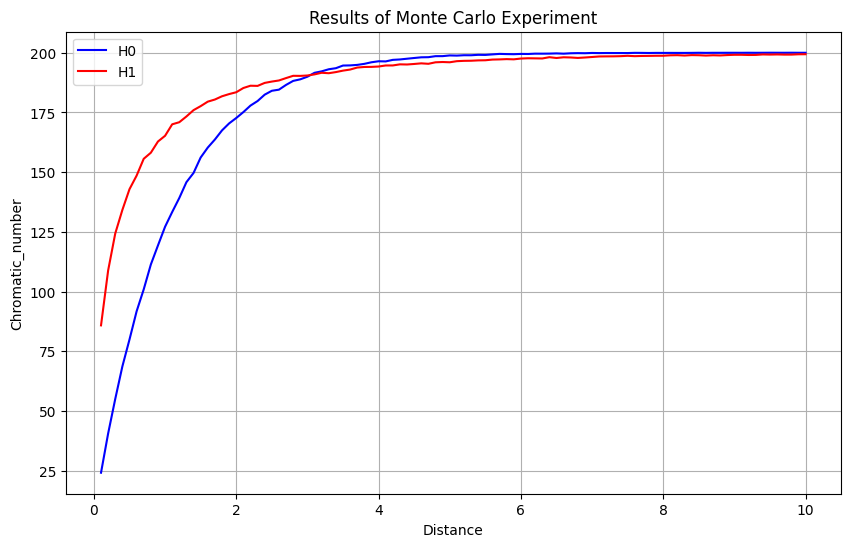

In [25]:
plt.figure(figsize=(10, 6))

# График для h0
plt.plot(results_with_variable_d_h0.keys(), results_with_variable_d_h0.values(), linestyle='-', color='b', label='H0')

# График для h1
plt.plot(results_with_variable_d_h1.keys(), results_with_variable_d_h1.values(), linestyle='-', color='r', label='H1')

plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Distance')
plt.ylabel('Chromatic_number')
plt.grid()
plt.legend()  # Добавляем легенду
plt.show()

Хроматическое число для H1 возрастает быстрее, чем для H0, но при $d \geq 3$ значения становятся почти равными.
В точках, близких к 0, хроматическое число при H1 значительно больше, чем при H0.

Теперь посмотрим, как оно зависит от размера набора данных для H0

In [11]:
data_size = np.arange(10, 1000, 10) #сгенерировали набор n -- размеров данных
results_with_variable_n_h0 = {}


for n in tqdm(data_size, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': n,
            'x': D,
            'lambda': 1,
            'distribution': 'h0'
         }

    results_with_variable_n_h0[n] = monte_carlo_experiment(params, n_sampels)

Processing: 100%|██████████| 99/99 [19:31<00:00, 11.83s/it]


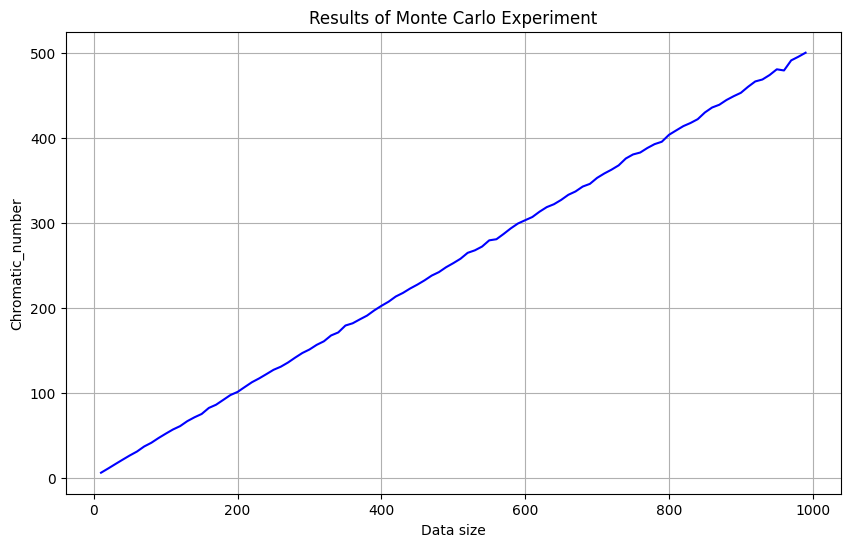

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(results_with_variable_n_h0.keys(), results_with_variable_n_h0.values(), linestyle='-', color='b')
plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Data size')
plt.ylabel('Chromatic_number')
plt.grid()
plt.show()

Как мы видим, хроматическое число возрастает почти линейно. 
Посмотрим для H1

In [13]:
data_size = np.arange(10, 1000, 10) #сгенерировали набор n -- размеров данных
results_with_variable_n_h1 = {}


for n in tqdm(data_size, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': n,
            'x': D,
            'lambda': 1/np.sqrt(10),
            'distribution': 'h1'
         }

    results_with_variable_n_h1[n] = monte_carlo_experiment(params, n_sampels)

Processing: 100%|██████████| 99/99 [22:38<00:00, 13.72s/it]


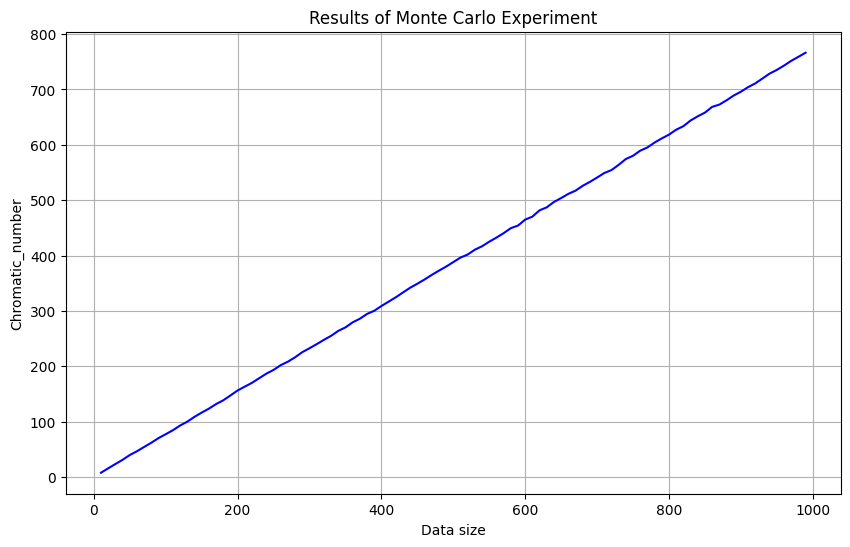

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(results_with_variable_n_h1.keys(), results_with_variable_n_h1.values(), linestyle='-', color='b')
plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Data size')
plt.ylabel('Chromatic_number')
plt.grid()
plt.show()

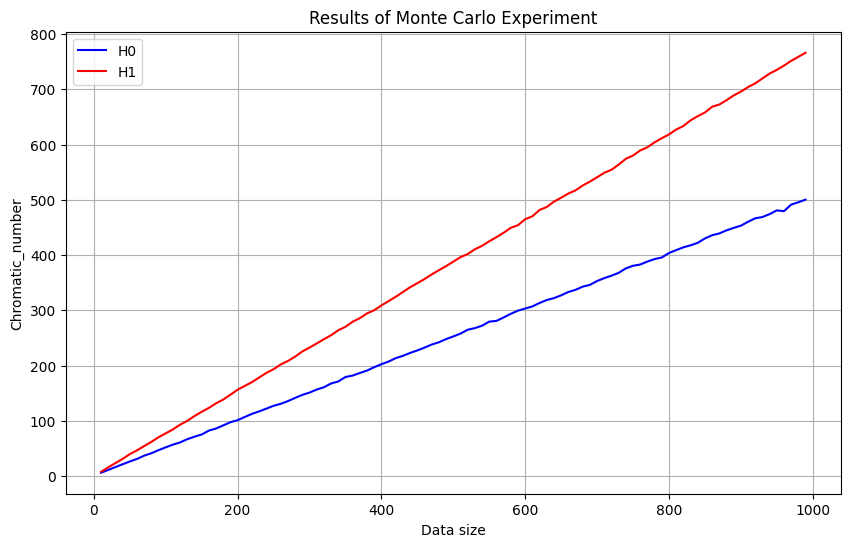

In [24]:
plt.figure(figsize=(10, 6))

# График для h0
plt.plot(results_with_variable_n_h0.keys(), results_with_variable_n_h0.values(), linestyle='-', color='b', label='H0')

# График для h1
plt.plot(results_with_variable_n_h1.keys(), results_with_variable_n_h1.values(), linestyle='-', color='r', label='H1')

plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Data size')
plt.ylabel('Chromatic_number')
plt.grid()
plt.legend()  # Добавляем легенду
plt.show()

Как мы видим, обе функции растут почти линейно, но функция при H1 растет значительно быстрее, чем при H0.
